# K Nearest Neighbors

In [29]:
import numpy as np
#from sklearn import preprocessing, cross_validation, neighbors # Version Anterior
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd



In [30]:
df = pd.read_csv("curso_complementario/datasets/cancer/breast-cancer-wisconsin.data.txt", header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [31]:
# en este tipo de analisis si faltase un valor, rellanamos con valores bastantes negativos

In [32]:
df.describe()

,0,1,2,3,4,5,7,8,9,10
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [33]:
df.columns =["name","v1","v2","v3","v4", "v5", "v6","v7","v8","v9","class"]

In [34]:
df.head()

,name,v1,v2,v3,v4,v5,v6,v7,v8,v9,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [35]:
df = df.drop("name", axis=1)

In [36]:
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [37]:
df.replace("?", - 9999, inplace=True)

In [38]:
x = df.drop("class", axis=1)
y = df["class"]

In [39]:
x.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [40]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int64

# Clasificador de los K vecinos

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

In [42]:
clf = KNeighborsClassifier()


In [43]:
clf.fit(x_train, y_train)

KNeighborsClassifier()

In [44]:
accuracy = clf.score(x_test, y_test)
accuracy

0.9785714285714285

# Clasificacion sin limpieza

In [28]:
df = pd.read_csv("curso_complementario/datasets/cancer/breast-cancer-wisconsin.data.txt", header=None)
df.replace("?", - 9999, inplace=True)
df.columns =["name","v1","v2","v3","v4", "v5", "v6","v7","v8","v9","class"]
x = df.drop("class", axis=1)
y = df["class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
accuracy

0.5714285714285714

# Clasificar nuevos datos

In [52]:
sample_measure =  np.array([4,2,1,1,1,2,3,2,1])

In [55]:
sample_measure = sample_measure.reshape(1,-1)

In [56]:
predict = clf.predict(sample_measure)

In [57]:
predict

array([2], dtype=int64)

In [64]:
sample_measure_2 = np.array([[4,2,1,1,1,2,3,2,1], [4,2,1,1,1,2,3,2,1]])


In [65]:
predict = clf.predict(sample_measure_2)

In [66]:
predict

array([2, 2], dtype=int64)

# Creando nuestro propio KNN

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter


In [73]:
dataset = {
    "k":[[1,2],[2,3],[3,1]],
    "r":[[6,5],[7,7],[8,6]]
    
}
new_point = [5, 7]



[[1, 2], [2, 3], [3, 1]]

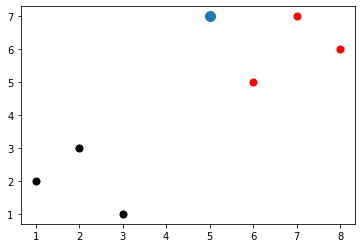

In [71]:
[[plt.scatter(ii[0],ii[1], s = 50, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s = 100)

In [109]:
def k_nearest_neighbors(data, predict, k = 3, verbose =False ):
    
    
    if len(data) >= k:
        warnings.warn("K es un valor menor que el numero total de elementos a votar")
        
    distances = []
    for group in data:
        for feature in data[group]:
            #d =sqrt((feature[0]-predict[0])**2 + (feature[1]-predict[1])**2)
           # d = np.sqrt(np.sum((np.array(feature)-np.array(predict))**2))
            d = np.linalg.norm(np.array(feature)-np.array(predict))
            distances.append([d, group])
    if verbose:
        print(distances)
    # los k vecinos mas cercanos
    votes = [i[1] for i in sorted(distances)[:k]]# sorted ordena por la primera columna(prmer item del array)
    if verbose:
        print(votes)
    
    # Cuento los votos
    vote_result = Counter(votes).most_common(1)[0][0] #  estructura que retorna el most commom[("r",2), ("k",1)]

    if verbose:
        print(vote_result)
    return vote_result

In [81]:
new_point = [3,4]
result = k_nearest_neighbors(dataset, new_point)
result

[[2.8284271247461903, 'k'], [1.4142135623730951, 'k'], [3.0, 'k'], [3.1622776601683795, 'r'], [5.0, 'r'], [5.385164807134504, 'r']]
['k', 'k', 'k']
k


'k'

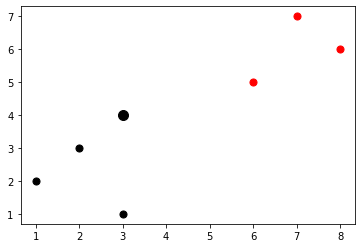

In [82]:
[[plt.scatter(ii[0],ii[1], s = 50, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s = 100, color= result)

# Aplicando nuestro KNN al Dataset del Cancer

In [83]:
import pandas as pd

In [84]:
df = pd.read_csv("curso_complementario/datasets/cancer/breast-cancer-wisconsin.data.txt")


In [85]:
df.replace("?", - 9999, inplace=True)

In [86]:
df.columns =["name","v1","v2","v3","v4", "v5", "v6","v7","v8","v9","class"]

In [87]:
df = df.drop("name", axis=1)

In [88]:
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [89]:
full_data = df.astype(float).values.tolist()
full_data

[[5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0],
 [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [5.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 7.0, 5.0, 10.0, 7.0, 9.0, 5.0, 5.0, 4.0, 4.0],
 [7.0, 4.0, 6.0, 4.0, 6.0, 1.0, 4.0, 3.0, 1.0, 4.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [10.0, 7.0, 7.0, 6.0, 4.0, 10.0, 4.0, 1.0, 2.0, 4.0],
 [6.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1

In [90]:
import random

In [91]:
random.shuffle(full_data)
test_size= 0.2

In [92]:
test_size = 0.2

In [111]:
train_set = {2:[], 4:[]}
test_set = {2:[],4:[]}


In [112]:
# todo menos el 20 porciento
train_data = full_data[:-int(test_size*len(full_data))]
# desde el  ultimo 20 porciento en adelante
test_data = full_data[-int(test_size*len(full_data)):]

In [113]:
# guardo las clases en caso de usar diccionarios

for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [114]:
train_set

{2: [[1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [3.0, 3.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 3.0, 4.0, 1.0, 3.0, 2.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [4.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 2.0, 1.0],
  [5.0, 3.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [6.0, 1.0, 3.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [5.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [5.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 1.0],
  [5.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 3.0, 2.0, 2.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 2.0, 1.0],
  [5.0, 2.0, 2.0,

In [110]:
correct = 0
total = 0
for group in test_set:
    for data in test_set[group]:
    # se compara con todos los puntos de entrenamiento   
    vote = k_nearest_neighbors(train_set, data, k = 5)
        if  group == vote:
            correct += 1
        total +=1
print("Eficacia del KNN =", correct/total)

Eficacia del KNN = 0.9640287769784173
